In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from scipy.stats import skew

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import preprocessing

# Model Building
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Model Selection
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

#### Data quality checking, missing data imputation

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train_data.shape)
print(train_data.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [4]:
print(test_data.shape)
print(test_data.columns)

(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [5]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

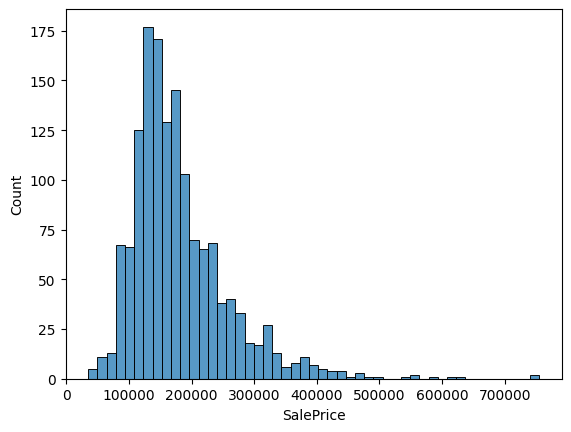

In [6]:
plt.tight_layout()
sns.histplot((train_data["SalePrice"]))

(0.0, 850000.0)

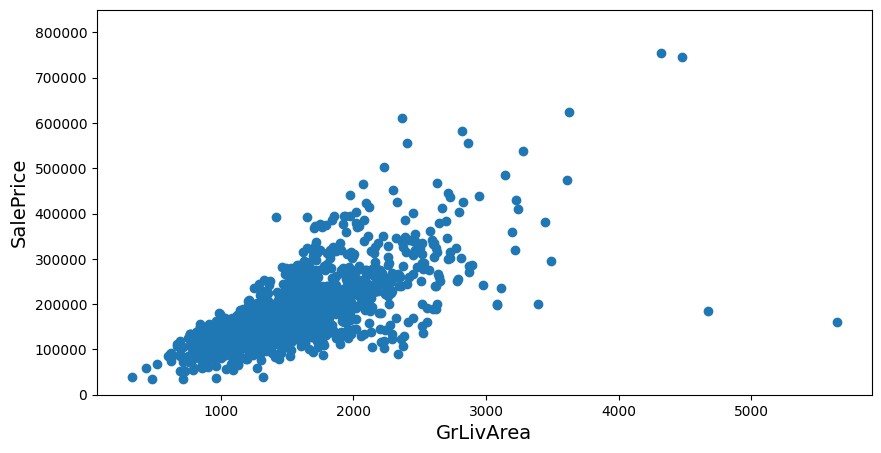

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_data.GrLivArea, y=train_data.SalePrice)
plt.xlabel("GrLivArea", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.ylim(0, 850000)

<function matplotlib.pyplot.show(close=None, block=None)>

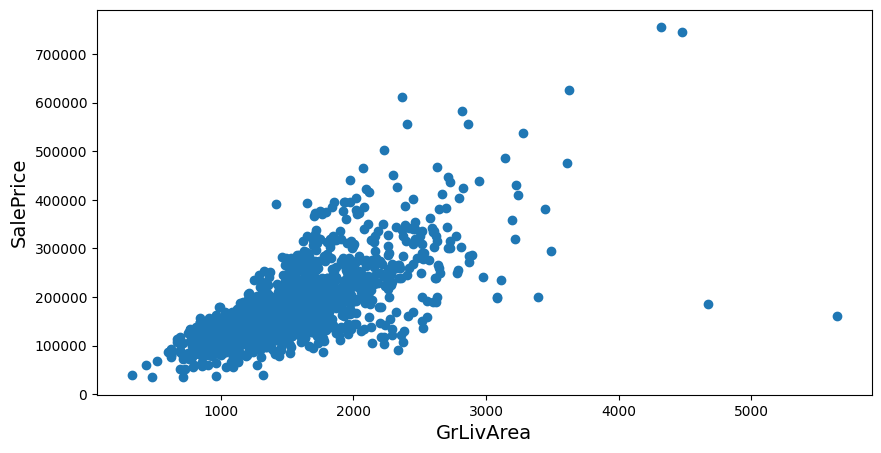

In [8]:
# Removing outliers
train_data.drop(
    train_data[
        (train_data["GrLivArea"] > 4000) & (train_data["SalePrice"] < 300000)
    ].index
)

# Graph after removing outliers
plt.figure(figsize=(10, 5))
plt.scatter(x=train_data["GrLivArea"], y=train_data["SalePrice"])
plt.xlabel("GrLivArea", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.show

In [9]:
New_Data = pd.concat([train_data, test_data], ignore_index=True)
New_Data.shape

(2919, 81)

In [10]:
Total_missing = New_Data.isnull().sum().sort_values(ascending=False)
Contain_NA = Total_missing[Total_missing.values != 0]
Contain_NA

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
Electrical         1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
BsmtUnfSF          1
dtype: int64

C:\Users\bk349\AppData\Local\Temp\ipykernel_11832\2283442939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = New_Data.corr(method = 'pearson')


<AxesSubplot: >

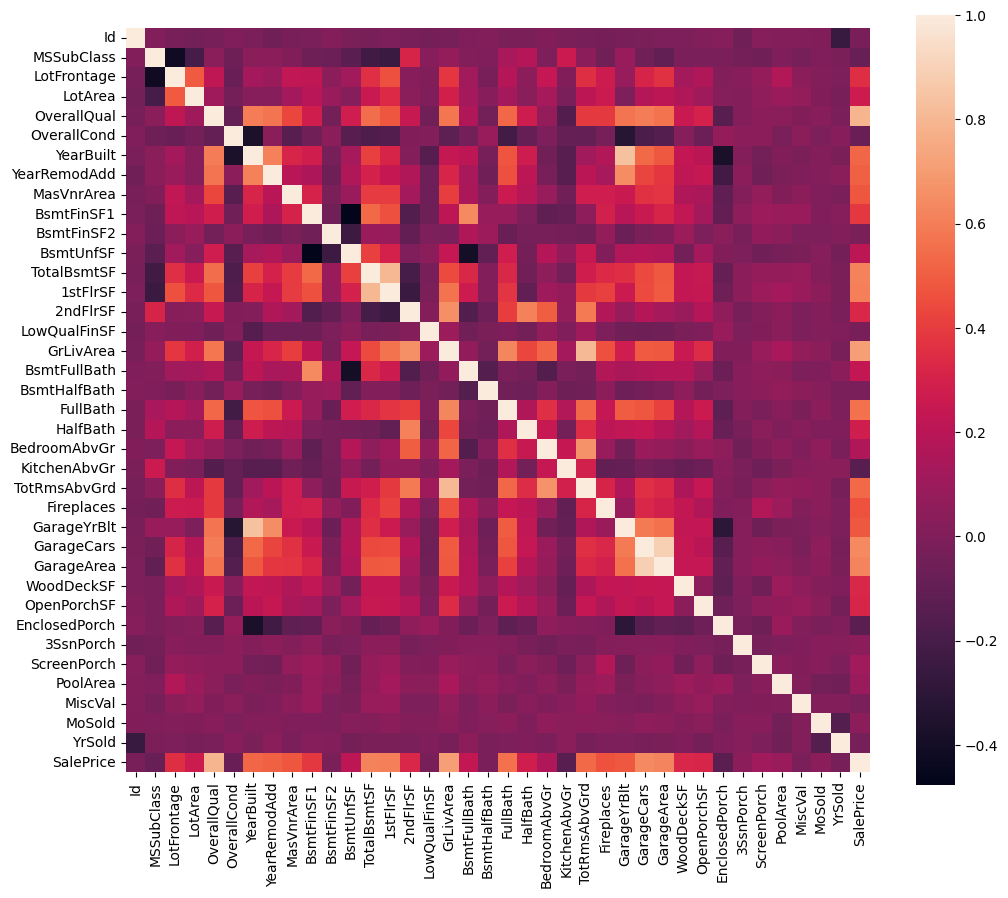

In [11]:
# Correlation map to see how features are correlated with SalePrice
corr = New_Data.corr(method="pearson")
plt.subplots(figsize=(12, 10))
sns.heatmap(corr, square=True)

In [12]:
Recopy = New_Data.copy()
Recopy["LotAreaCut"] = pd.qcut(Recopy.LotArea, 10)
Recopy.groupby(["LotAreaCut"])[["LotFrontage"]].agg(["mean", "median", "count"])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4922.4]    35.741036   34.0   251
(4922.4, 7007.6]      55.460674   52.0   267
(7007.6, 7960.4]      63.008000   62.0   250
(7960.4, 8741.0]      66.964844   65.0   256
(8741.0, 9453.0]      70.106996   70.0   243
(9453.0, 10151.6]     73.972656   75.0   256
(10151.6, 11001.2]    73.650794   75.0   252
(11001.2, 12203.8]    83.377193   82.0   228
(12203.8, 14300.6]    84.991228   85.0   228
(14300.6, 215245.0]   94.188119   90.0   202

#### Impute and cleaning the missing values

In [13]:
Recopy = Recopy.drop(columns=["Id", "Street", "PoolQC", "Utilities"], axis=1)
Recopy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaCut
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,0,2,2008,WD,Normal,208500.0,"(7960.4, 8741.0]"
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,0,5,2007,WD,Normal,181500.0,"(9453.0, 10151.6]"
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,0,9,2008,WD,Normal,223500.0,"(11001.2, 12203.8]"
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,"(9453.0, 10151.6]"
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,0,12,2008,WD,Normal,250000.0,"(12203.8, 14300.6]"


In [14]:
Recopy["LotFrontage"] = Recopy.groupby(["LotAreaCut"])["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

In [15]:
cols1 = [
    "MasVnrArea",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "GarageCars",
    "BsmtFinSF2",
    "BsmtFinSF1",
    "GarageArea",
]
for name in cols1:
    Recopy[name].fillna(0, inplace=True)

In [16]:
cols2 = [
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "GarageFinish",
    "GarageYrBlt",
    "GarageType",
    "BsmtExposure",
    "BsmtCond",
    "BsmtQual",
    "BsmtFinType2",
    "BsmtFinType1",
    "MasVnrType",
]
for name in cols2:
    Recopy[name].fillna("None", inplace=True)

In [17]:
cols3 = [
    "MSZoning",
    "BsmtFullBath",
    "BsmtHalfBath",
    "Functional",
    "Electrical",
    "KitchenQual",
    "SaleType",
    "Exterior1st",
    "Exterior2nd",
]
for name in cols3:
    Recopy[name].fillna(Recopy[name].mode()[0], inplace=True)

In [18]:
Find_new_null = Recopy.isnull().sum()
Find_new_null[Find_new_null.values > 0]

SalePrice    1459
dtype: int64

In [19]:
object_features = Recopy.select_dtypes(include="object").columns
object_features
Recopy = Recopy.drop(columns=object_features, axis=1)

In [20]:
# Transform numerical features into categorical features
NumStr = ["MSSubClass"]
for col in NumStr:
    Recopy[col] = Recopy[col].astype(str)

In [21]:
# Transform categorical features into numerical features
Recopy["MSSubClass"] = Recopy.MSSubClass.map(
    {
        "180": 1,
        "30": 2,
        "45": 3,
        "190": 4,
        "50": 5,
        "90": 6,
        "85": 7,
        "40": 8,
        "160": 9,
        "70": 10,
        "20": 11,
        "75": 12,
        "80": 13,
        "150": 14,
        "120": 15,
        "60": 16,
    }
)
Recopy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotAreaCut
0,16,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,61,0,0,0,0,0,2,2008,208500.0,"(7960.4, 8741.0]"
1,11,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,5,2007,181500.0,"(9453.0, 10151.6]"
2,16,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,42,0,0,0,0,0,9,2008,223500.0,"(11001.2, 12203.8]"
3,10,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,35,272,0,0,0,0,2,2006,140000.0,"(9453.0, 10151.6]"
4,16,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,84,0,0,0,0,0,12,2008,250000.0,"(12203.8, 14300.6]"


In [22]:
df = Recopy.drop(["SalePrice"], axis=1)
df = df.drop(["LotAreaCut"], axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,16,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,11,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,16,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,10,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,16,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


#### Feature selection

In [23]:
class Label(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lab = LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        return X

In [24]:
class Skew_Dum(BaseEstimator, TransformerMixin):
    def __init__(self, skew=0.5):
        self.skew = skew

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_numeric = X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [25]:
pipe = Pipeline(
    [
        ("labenc", Label()),
        ("skew_dummies", Skew_Dum(skew=1)),
    ]
)

In [26]:
New_df = df.copy()
data_pipe = pipe.fit_transform(New_df)
data_pipe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,16,4.189655,9.042040,7,5,110,53,5.283204,6.561031,0.0,...,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008
1,11,4.394449,9.169623,6,8,83,26,0.000000,6.886532,0.0,...,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007
2,16,4.234107,9.328212,7,5,108,52,5.093750,6.188264,0.0,...,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008
3,10,4.110874,9.164401,7,5,25,20,0.000000,5.379897,0.0,...,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006
4,16,4.442651,9.565284,8,5,107,50,5.860786,6.486161,0.0,...,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008


In [27]:
scaler = RobustScaler()
n_train = train_data.shape[0]
X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y = train_data.SalePrice
X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train_data.SalePrice)
test_X_scaled = scaler.transform(test_X)
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X_scaled, y_log)

RandomForestRegressor(max_depth=10, random_state=1)

In [28]:
FI_lasso = pd.DataFrame(
    {"Feature Importance": model.feature_importances_}, index=data_pipe.columns
)


zz = dict(reversed(sorted(zip(model.feature_importances_, data_pipe.columns.values))))

print([i for i in zz.values()][:10])

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'YearBuilt', 'BsmtFinSF1', 'MSSubClass', 'LotArea']


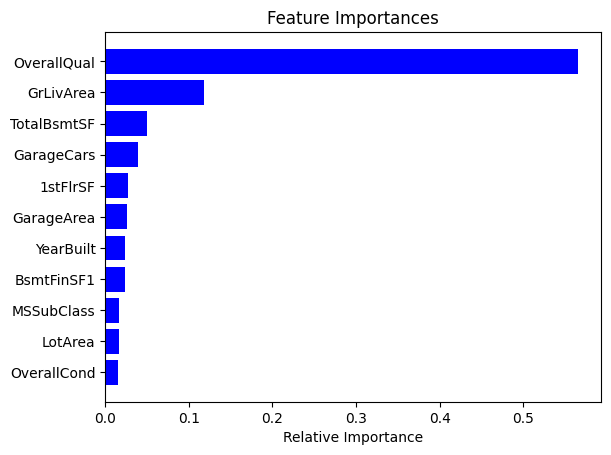

In [29]:
features = data_pipe.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-11:]  # top 10 features
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Creating new features

In [30]:
df_new = data_pipe

df_new["Garage_new"] = df_new["GarageArea"] + df_new["GarageCars"]
df_new["Life_area"] = df_new["GrLivArea"] = df_new["TotalBsmtSF"]
df_new["First_floor"] = df_new["1stFlrSF"] + df_new["BsmtFinSF1"]
df_new["Total"] = df_new["OverallQual"] + df_new["OverallCond"]
df_new["New_space"] = df_new["LotFrontage"] + df_new["LotArea"]
df_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Garage_new,Life_area,First_floor,Total,New_space
0,16,4.189655,9.042040,7,5,110,53,5.283204,6.561031,0.0,...,0.0,0.0,0.0,2,2008,550.0,6.753438,13.314469,12,13.231695
1,11,4.394449,9.169623,6,8,83,26,0.000000,6.886532,0.0,...,0.0,0.0,0.0,5,2007,462.0,7.141245,14.027777,14,13.564072
2,16,4.234107,9.328212,7,5,108,52,5.093750,6.188264,0.0,...,0.0,0.0,0.0,9,2008,610.0,6.825460,13.013724,12,13.562319
3,10,4.110874,9.164401,7,5,25,20,0.000000,5.379897,0.0,...,0.0,0.0,0.0,2,2006,645.0,6.629363,12.248912,12,13.275275
4,16,4.442651,9.565284,8,5,107,50,5.860786,6.486161,0.0,...,0.0,0.0,0.0,12,2008,839.0,7.044033,13.530194,13,14.007935


In [31]:
df_new.index

RangeIndex(start=0, stop=2919, step=1)

#### Linear-regression Algorithm

In [32]:
X_initial = df_new[["Garage_new", "Life_area", "First_floor", "Total", "New_space"]]
y_initial = New_Data["SalePrice"]
y_initial = y_initial.fillna(0)
X_Train, X_Test, y_Train, y_Test = train_test_split(
    X_initial, y_initial, test_size=0.5, random_state=88
)

In [33]:
regressor = LinearRegression()
regressor.fit(X_Train, y_Train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_Test)
y_pred

array([ 87434.8313533 ,  90919.4448282 ,  96600.02599969, ...,
       106194.6092992 ,  98926.80342026,  61682.58825945])

In [35]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_Test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_Test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_Test, y_pred)))
print("R-squared Error:", metrics.r2_score(y_Test, y_pred))

Mean Absolute Error: 90781.95023084206
Mean Squared Error: 10667043050.372396
Root Mean Squared Error: 103281.37804257066
R-squared Error: 0.09706964364243686


#### Improving the linear-regression, normalize the data

In [36]:
X_scaled = preprocessing.normalize(X_initial)
y_first = New_Data["SalePrice"]
y_first = y_first.fillna(np.mean(train_data["SalePrice"]))
X1_Train, X1_Test, y1_Train, y1_Test = train_test_split(
    X_scaled, y_first, test_size=0.5, random_state=88
)

In [37]:
regressor1 = LinearRegression()
regressor1.fit(X1_Train, y1_Train)

LinearRegression()

In [38]:
y_pred_reg = regressor1.predict(X1_Test)
y_pred_reg

array([180747.85235447, 154498.65535127, 141051.42260488, ...,
       185164.31771514, 186823.62078172, 162132.42365739])

In [39]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y1_Test, y_pred_reg))
print("Mean Squared Error:", metrics.mean_squared_error(y1_Test, y_pred_reg))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y1_Test, y_pred_reg))
)
print("R-squared Error:", metrics.r2_score(y1_Test, y_pred_reg))

Mean Absolute Error: 31606.52701047122
Mean Squared Error: 2982691231.1563783
Root Mean Squared Error: 54614.02046321419
R-squared Error: 0.11097795750372774


#### Decision Tree Algorithm

In [40]:
DTre = DecisionTreeRegressor()
DTre.fit(X_Train, y_Train)
y1_pred = DTre.predict(X_Test)
y1_pred

array([     0.,      0., 116900., ..., 185000.,      0.,      0.])

In [41]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_Test, y1_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_Test, y1_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_Test, y1_pred)))
print("R-squared Error:", metrics.r2_score(y_Test, y1_pred))

Mean Absolute Error: 102112.31232876712
Mean Squared Error: 21540067284.10959
Root Mean Squared Error: 146765.3476952567
R-squared Error: -0.823296347166047


#### Improving Decision Tree, normalizing the data

In [42]:
DTree = DecisionTreeRegressor()
DTree.fit(X1_Train, y1_Train)
y2_pred = DTre.predict(X1_Test)
y2_pred

C:\Users\bk349\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y1_Test, y2_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y1_Test, y2_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y1_Test, y2_pred)))
print("R-squared Error:", metrics.r2_score(y1_Test, y2_pred))

Mean Absolute Error: 182437.89026271345
Mean Squared Error: 36638608863.16005
Root Mean Squared Error: 191412.1439803652
R-squared Error: -9.920517197859708


#### SVM Algorithm

In [44]:
Svm_reg = LinearSVR(epsilon=1.5)
Svm_reg.fit(X_Train, y_Train)
y3_pred = Svm_reg.predict(X_Test)
y3_pred

array([4831.49329198, 7726.14561795, 7816.08246432, ..., 6003.16430264,
       4521.78752671, 7192.00205276])

In [45]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_Test, y3_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_Test, y3_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_Test, y3_pred)))
print("R-squared Error:", metrics.r2_score(y_Test, y3_pred))

Mean Absolute Error: 91588.24266225373
Mean Squared Error: 19299068206.983505
Root Mean Squared Error: 138921.0862575711
R-squared Error: -0.6336030942419593


#### Improving the SVM, normalizing data

In [46]:
Svm = LinearSVR(epsilon=1.5)
Svm.fit(X1_Train, y1_Train)
y4_pred = Svm.predict(X1_Test)
y4_pred

array([2835.13369885, 2837.06556543, 2837.39442148, ..., 2834.6279723 ,
       2834.47957847, 2836.53842181])

In [47]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y1_Test, y4_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y1_Test, y4_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y1_Test, y4_pred)))
print("R-squared Error:", metrics.r2_score(y1_Test, y4_pred))

Mean Absolute Error: 179662.75266320712
Mean Squared Error: 35629800132.09955
Root Mean Squared Error: 188758.57631403016
R-squared Error: -9.619831297419463
